#Laboratorio Práctico: Procesamiento de Imágenes
**Tiempo estimado:** 50 minutos

**Objetivos:** Al finalizar este laboratorio, vas a poder aplicar conceptos fundamentales de manipulación, análisis y segmentación de imágenes utilizando las librerías `OpenCV` y `scikit-image`     

In [1]:
# Importación de las librerías necesarias para el laboratorio
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
import skimage as ski
from skimage import filters, feature, exposure
from PIL import Image

##Parte 0: Preparación del Entorno (5 minutos)

Primero, vamos a descargar las imágenes que vamos a usar en los ejercicios. Con estos comandos, las guardamos en el entorno de ejecución del notebook.

- `texto.png:` Una imagen con texto, ideal para el análisis de bordes.

- `paisaje.jpg:` Una imagen a color para la manipulación de canales.

- `monedas.jpg:` Una imagen de monedas sobre un fondo, perfecta para segmentación.

In [2]:
# Descarga de las imágenes de trabajo
!wget -q https://lh3.googleusercontent.com/proxy/0Lf8l5VqGTH-Xv7EWfMiY-l4EVxRzuYYtAN9GI_eXCuioGp0K2BsrXo38WAMRjJR3aNB-602vjmichZ9dpN7rcoiNtpRSyIIakM -O texto.png
!wget -q https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/124084.jpg -O paisaje.jpg
!wget -q https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg -O monedas.jpg

print("Imágenes descargadas correctamente.")

Imágenes descargadas correctamente.


In [5]:
# Función auxiliar que vamos a usar durante todo el laboratorio
def mostrar_imagenes(imagenes, titulos, cmap='gray', figsize=(12, 4)):
    """
    Función auxiliar para visualizar una o más imágenes en una misma fila.
    """
    n = len(imagenes)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes] # Hacemos que sea iterable si es una sola imagen
    for ax, img, titulo in zip(axes, imagenes, titulos):
        # Usamos el mapa de color 'cmap' solo si la imagen es en escala de grises
        ax.imshow(img, cmap=cmap if len(img.shape) == 2 else None)
        ax.set_title(titulo)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

###Ejercicio 1: Análisis y Manipulación Básica (10 minutos)

Empezamos con lo fundamental: cargar una imagen y entender su estructura.

Tareas:

- Cargá la imagen `paisaje.jpg` usando OpenCV.

- Implementá una función que analice y muestre sus propiedades principales.

- Extraé y visualizá cada canal de color (Azul, Verde, Rojo) por separado.

- Convertí la imagen del formato BGR (propio de OpenCV) a RGB y comparala con la original.

In [14]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 1
# --------------------------------------

# 1.1: Cargá la imagen 'paisaje.jpg'
img_paisaje = cv2.imread("paisaje.jpg")

# 1.2: Implementá esta función
def analizar_imagen(img, nombre="Imagen"):
    print(f"--- Propiedades de {nombre} ---")
    print(f"Tipo de dato: {type(img)}")
    print(f"Dimensiones (alto, ancho, canales): {img.shape}")
    print(f"Tipo de los píxeles: {img.dtype}")
    print(f"Valor mínimo: {img.min()}")
    print(f"Valor máximo: {img.max()}")
    print()

analizar_imagen(img_paisaje, "paisaje.jpg")

# 1.3: Extraé cada canal de color
# Recordá que OpenCV carga las imágenes en formato BGR
canal_b = img_paisaje[:, :, 0]
canal_g = img_paisaje[:, :, 1]
canal_r = img_paisaje[:, :, 2]

# 1.4: Convertí la imagen de BGR a RGB
img_rgb = cv2.cvtColor(img_paisaje, cv2.COLOR_BGR2RGB)

# Visualización sugerida (descomentar cuando tengas las variables):
# mostrar_imagenes([canal_b, canal_g, canal_r],
#                  ['Canal Azul', 'Canal Verde', 'Canal Rojo'])
#mostrar_imagenes([img_paisaje, img_rgb],
#                 ['Imagen Original (BGR)', 'Imagen Convertida (RGB)'])

--- Propiedades de paisaje.jpg ---
Tipo de dato: <class 'numpy.ndarray'>
Dimensiones (alto, ancho, canales): (321, 481, 3)
Tipo de los píxeles: uint8
Valor mínimo: 0
Valor máximo: 255



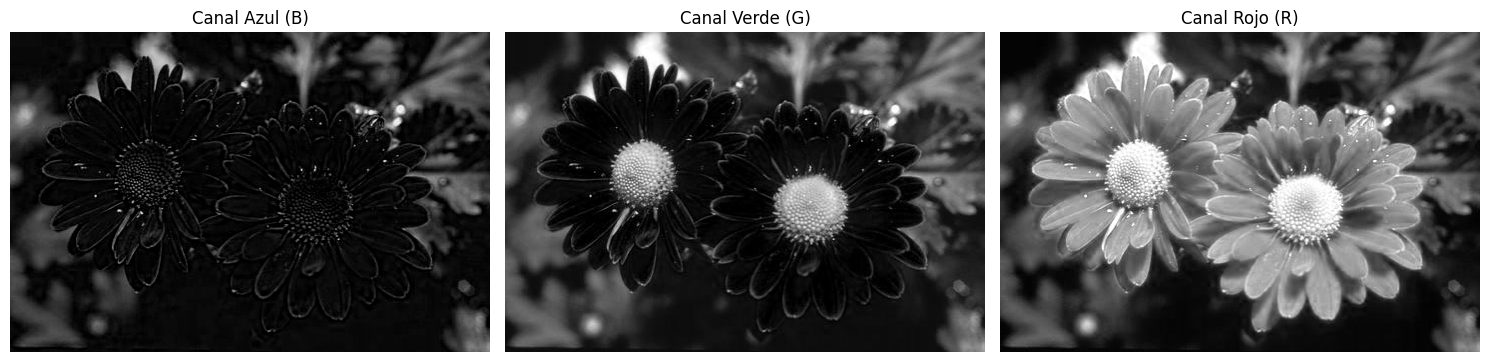

In [16]:
# Mostrar los tres canales por separado
mostrar_imagenes(
    [canal_b, canal_g, canal_r],
    ["Canal Azul (B)", "Canal Verde (G)", "Canal Rojo (R)"],
    cmap="gray",
    figsize=(15,5)
)

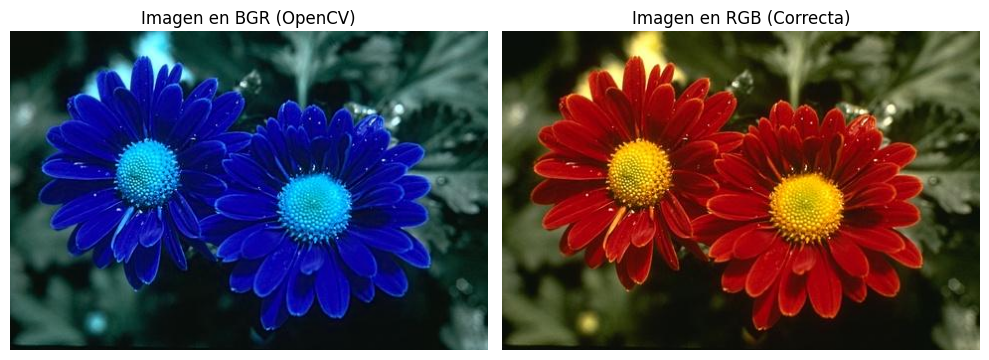

In [15]:
# Mostrar la imagen original y la convertida a RGB
mostrar_imagenes(
    [img_paisaje, img_rgb],
    ["Imagen en BGR (OpenCV)", "Imagen en RGB (Correcta)"],
    figsize=(10,5)
)

In [ ]:
# --- Pregunta Conceptual ---
print("Pregunta Conceptual 1:")
print("¿Por qué la imagen se ve con colores extraños cuando se muestra")
print("directamente con matplotlib después de cargarla con OpenCV?")

In [ ]:
print("Tu respuesta: _______________________________________________\n")

Porque OpenCV carga las imágenes en formato BGR, mientras que matplotlib espera que estén en formato RGB. Al no convertir entre ambos espacios de color, los canales se muestran intercambiados y los colores aparecen distorsionados.

### Ejercicio 2: Transformaciones Geométricas (10 minutos)

Ahora vamos a manipular la geometría de la imagen.

Tareas:

- Recortá una "región de interés" (ROI) de 100x100 píxeles de la imagen del paisaje.

- Redimensioná ese recorte para que mida 200x200 píxeles.

- Creá un mosaico de 2x2 utilizando el recorte redimensionado.

- (Opcional) Aplicá una rotación de 45 grados al recorte original.

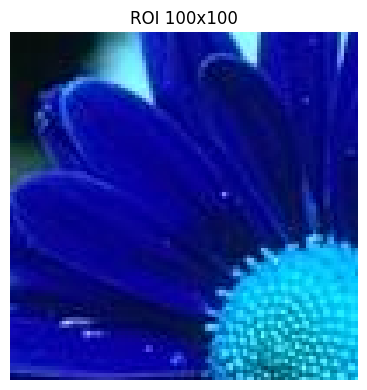

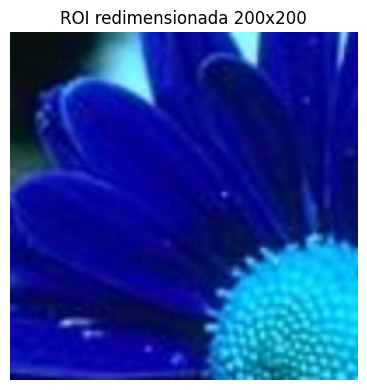

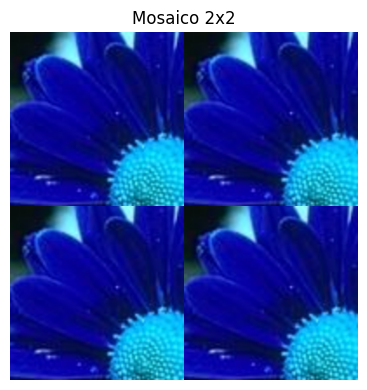

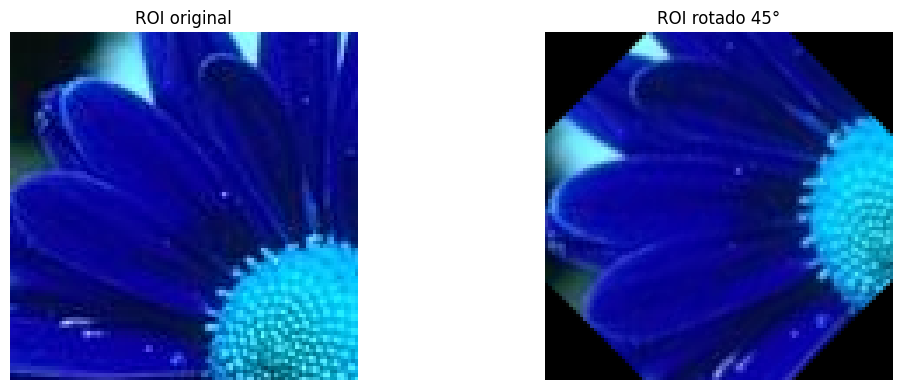

In [17]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 2
# --------------------------------------

# 2.1: Definí y extraé una región de interés (ROI)
# roi = img_paisaje[y:y+h, x:x+w] # Completá los índices
x, y, w, h = 50, 50, 100, 100   # coordenadas y tamaño del ROI
roi = img_paisaje[y:y+h, x:x+w]

# Mostrar ROI
mostrar_imagenes([roi], ["ROI 100x100"])

# 2.2: Redimensioná la ROI a 200x200
roi_grande = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LINEAR)
mostrar_imagenes([roi_grande], ["ROI redimensionada 200x200"])

# 2.3: Creá un mosaico 2x2
# Pista: usá np.vstack para apilar verticalmente y np.hstack para apilar horizontalmente.
fila1 = np.hstack([roi_grande, roi_grande])
fila2 = np.hstack([roi_grande, roi_grande])
mosaico = np.vstack([fila1, fila2])

mostrar_imagenes([mosaico], ["Mosaico 2x2"])

# 2.4: BONUS - Rotación
# Para rotar, necesitás una matriz de rotación y luego aplicar una transformación afín.
centro = (roi.shape[1] // 2, roi.shape[0] // 2)  # (x, y) del centro
angulo = 45
M = cv2.getRotationMatrix2D(centro, angulo, 1.0)
roi_rotado = cv2.warpAffine(roi, M, (roi.shape[1], roi.shape[0]))

mostrar_imagenes([roi, roi_rotado], ["ROI original", "ROI rotado 45°"])

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 2:")
print("¿Cuál es la diferencia principal entre recortar (crop) y redimensionar (resize)?")
print("¿En qué casos prácticos usarías cada operación?")

In [ ]:
print("Tu respuesta: _______________________________________________\n")

Recortar (crop) consiste en seleccionar una parte de la imagen y descartar el resto, manteniendo la resolución original en esa zona. Se usa por ejemplo para enfocar un objeto de interés o eliminar partes irrelevantes.
Redimensionar (resize), en cambio, cambia el tamaño completo de la imagen interpolando los píxeles, lo que puede aumentar o reducir su resolución.
Se usa en tareas como ajustar imágenes para redes neuronales, preparar datos para la web o escalar imágenes a un tamaño uniforme.

### Ejercicio 3: Detección de Bordes (OpenCV vs. Scikit-image) (10 minutos)

En este ejercicio, vamos a comparar dos de los algoritmos más populares para la detección de bordes.

Tareas:

- Cargá la imagen `texto.png` y convertila a escala de grises.

- Aplicá el detector de bordes Canny con OpenCV. Experimentá con distintos umbrales.

- Aplicá el detector de bordes Sobel con scikit-image.

- Compará visualmente los resultados de ambos métodos.

In [18]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 3
# --------------------------------------

# 3.1: Cargá 'texto.png' y convertila a escala de grises
img_texto = imread('texto.png')
img_gray = cv2.cvtColor(img_texto, cv2.COLOR_BGR2GRAY)

mostrar_imagenes([img_gray], ["Texto en escala de grises"])

# 3.2: Aplicá Canny con OpenCV
# Probá con diferentes umbrales, por ejemplo: (50, 150), (100, 200)
bordes_canny1 = cv2.Canny(img_gray, 50, 150)
bordes_canny2 = cv2.Canny(img_gray, 100, 200)

# 3.3: Aplicá Sobel con scikit-image
bordes_sobel = ski.filters.sobel(img_gray)

# 3.4: Para una mejor comparación, aplicá también Canny con scikit-image
# Nota: scikit-image espera que los valores de la imagen estén entre 0 y 1.
bordes_ski_canny = ski.feature.canny(img_gray / 255.0)

# Visualización sugerida:
# mostrar_imagenes([img_gray, bordes_canny, bordes_sobel, bordes_ski_canny],
#                  ['Original', 'Canny (OpenCV)', 'Sobel (Scikit)', 'Canny (Scikit)'])

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
mostrar_imagenes(
    [img_gray, bordes_canny1, bordes_canny2, bordes_sobel, bordes_ski_canny],
    ["Original (gris)", "Canny OpenCV (50-150)", "Canny OpenCV (100-200)", "Sobel (Scikit)", "Canny (Scikit)"],
    cmap="gray",
    figsize=(18,6)
)

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 3:")
print("¿Qué diferencias fundamentales observás entre los resultados de Canny y Sobel?")
print("¿Cuándo preferirías usar uno sobre el otro?")

In [ ]:
print("Tu respuesta: _______________________________________________\n")

## Ejercicio 4: Segmentación de Monedas (10 minutos)

La segmentación consiste en dividir una imagen en regiones significativas. La umbralización (thresholding) es una de las técnicas más simples para lograrlo.

Tareas:

- Cargá `monedas.jpg` y convertila a escala de grises.

- Implementá tu propia función para segmentar por umbral.

- Probá la función con diferentes valores de umbral.

- Calculá el área segmentada (cantidad de píxeles blancos) para cada umbral.

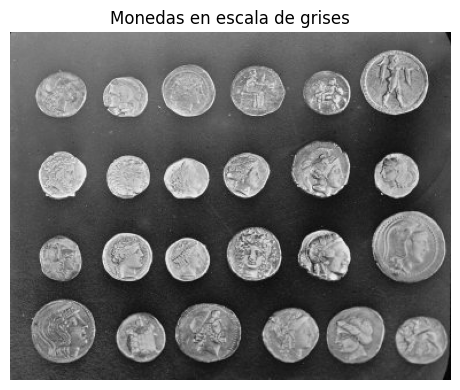

Umbral 80: área segmentada = 62290 píxeles


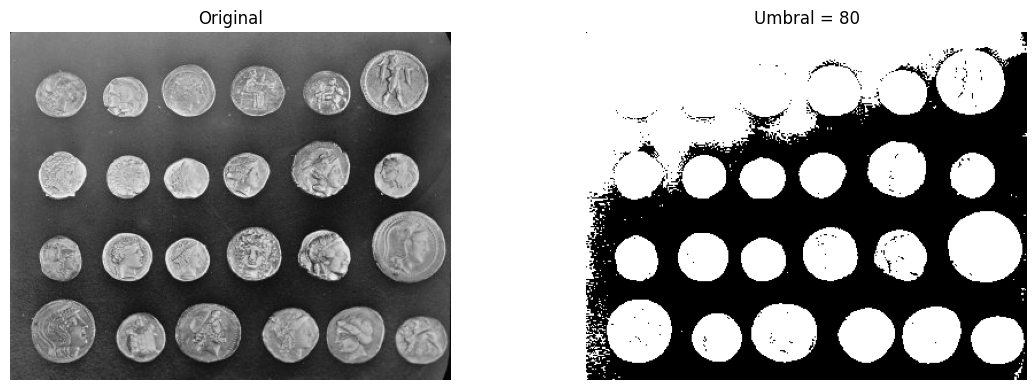

Umbral 120: área segmentada = 38336 píxeles


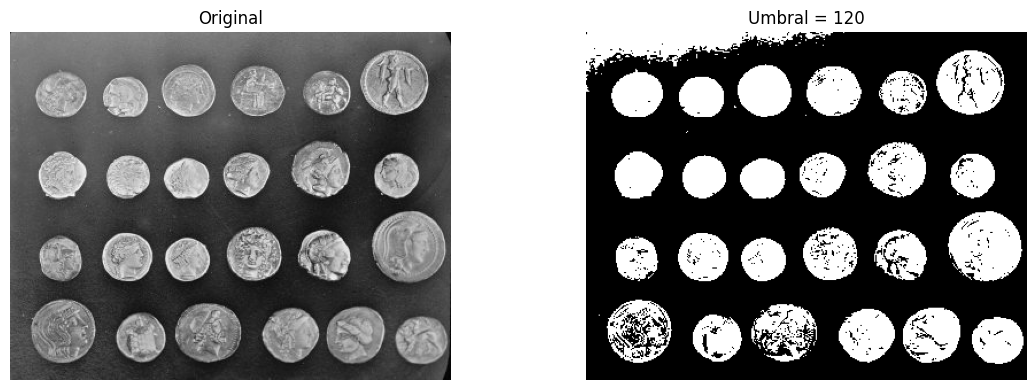

Umbral 160: área segmentada = 18993 píxeles


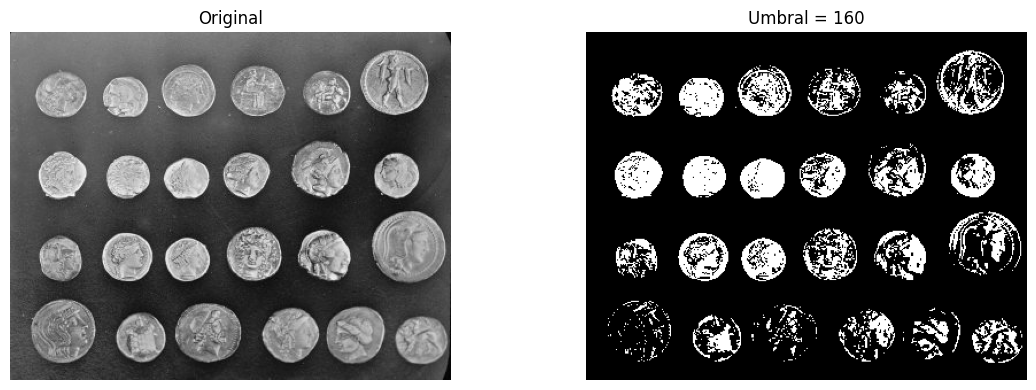

In [19]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 4
# --------------------------------------

# 4.1: Cargá la imagen de monedas y pasala a escala de grises
img_monedas = cv2.imread('monedas.jpg')
monedas_gray = cv2.cvtColor(img_monedas, cv2.COLOR_BGR2GRAY)

mostrar_imagenes([monedas_gray], ["Monedas en escala de grises"])

# 4.2: Implementá esta función
def segmentar_umbral(imagen, umbral):
    """
    Segmenta una imagen usando un umbral fijo.
    - Los píxeles con valor > umbral se convierten en 255 (blanco).
    - Los píxeles con valor <= umbral se convierten en 0 (negro).

    Debe retornar la imagen segmentada y el área en píxeles (cantidad de píxeles blancos).
    Pista: podés usar np.where() o indexación booleana de NumPy.
    """
    # Tu código acá
    # Crear imagen binaria
    segmentada = np.where(imagen > umbral, 255, 0).astype(np.uint8)
    # Calcular área (número de píxeles blancos)
    area = np.sum(segmentada == 255)
    return segmentada, area

# 4.3: Probá con diferentes umbrales y mostrá los resultados
umbrales = [80, 120, 160]
for t in umbrales:
    segmentada, area = segmentar_umbral(monedas_gray, t)
    print(f"Umbral {t}: área segmentada = {area} píxeles")
    mostrar_imagenes([monedas_gray, segmentada], [f'Original', f'Umbral = {t}'])

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 4:")
print("¿Cómo afecta una iluminación no uniforme a la segmentación por umbral?")
print("¿Qué estrategia podrías usar para mitigar este problema?")

In [ ]:
print("Tu respuesta: _______________________________________________\n")

Una iluminación no uniforme puede hacer que algunas áreas de la imagen sean más claras u oscuras que otras, provocando que un mismo umbral falle: algunos objetos podrían quedar parcialmente segmentados o perderse. Para mitigar esto, se puede usar umbralización adaptativa (thresholding adaptativo), que calcula el umbral localmente para cada región de la imagen, o normalizar la iluminación antes de segmentar.

### Ejercicio 5: Análisis con Histogramas (5 minutos)

El histograma de una imagen nos da información valiosa sobre la distribución de las intensidades de los píxeles.

Tareas:

- Calculá el histograma de la imagen de las monedas en escala de grises.

- Identificá cuál es el nivel de gris más frecuente en la imagen.

- Visualizá el histograma.

El nivel de gris más frecuente es: 36


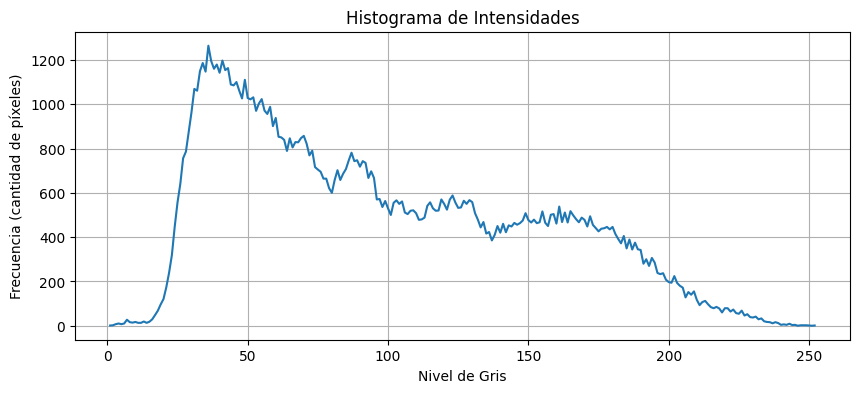

In [20]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO 5
# --------------------------------------

# 5.1: Calculá el histograma usando scikit-image
hist, bins = ski.exposure.histogram(monedas_gray)

# 5.2: Encontrá el valor de gris más frecuente
# Pista: usá np.argmax() sobre el histograma para encontrar el índice del valor máximo.
valor_mas_frecuente = bins[np.argmax(hist)]
print(f"El nivel de gris más frecuente es: {valor_mas_frecuente}")

# 5.3: Visualizá el histograma con matplotlib
plt.figure(figsize=(10, 4))
plt.plot(bins, hist)
plt.title('Histograma de Intensidades')
plt.xlabel('Nivel de Gris')
plt.ylabel('Frecuencia (cantidad de píxeles)')
plt.grid(True)
plt.show()

In [ ]:
# --- Pregunta Conceptual ---
print("\nPregunta Conceptual 5:")
print("Observando el histograma, ¿qué información te puede ayudar a elegir")
print("un buen valor de umbral para la segmentación del ejercicio anterior?")

In [ ]:
print("Tu respuesta: _______________________________________________\n")

###Ejercicio Integrador: Pipeline Completo (10 minutos)

¡Llegó el momento de juntar todo! Vamos a crear una única función que realice un flujo de trabajo completo de procesamiento de imágenes.

Objetivo:

- Creá una función pipeline_procesamiento que reciba la ruta de una imagen y aplique una secuencia de pasos:

- Cargar la imagen.

- Realizar un preprocesamiento (convertir a escala de grises).

- Detectar los bordes.

- Segmentar la imagen original en escala de grises.

- Devolver y mostrar todos los resultados intermedios y finales.

In [ ]:
# ESPACIO PARA TU CÓDIGO - EJERCICIO INTEGRADOR
# --------------------------------------

def pipeline_procesamiento(ruta_imagen, umbral_seg=120, canny_low=50, canny_high=150):
    """
    Pipeline que realiza un procesamiento de imagen de punta a punta.

    Parámetros:
    - ruta_imagen: Path al archivo de la imagen.
    - umbral_seg: Umbral para la segmentación.
    - canny_low, canny_high: Umbrales para el detector Canny.

    Retorna:
    - Un diccionario con las imágenes procesadas en cada paso.
    """
    resultados = {}

    # 1. Cargar la imagen
    # ...
    # resultados['Original'] = ...

    # 2. Convertir a escala de grises
    # ...
    # resultados['Gris'] = ...

    # 3. Aplicar detector de bordes Canny
    # ...
    # resultados['Bordes'] = ...

    # 4. Aplicar segmentación por umbral
    # ...
    # resultados['Segmentada'] = ...

    return resultados

# Probá tu pipeline con una de las imágenes
# resultados = pipeline_procesamiento('monedas.jpg')
# if resultados:
#     mostrar_imagenes(list(resultados.values()), list(resultados.keys()))

In [21]:
def pipeline_procesamiento(ruta_imagen, umbral_seg=120, canny_low=50, canny_high=150):
    """
    Pipeline que realiza un procesamiento de imagen de punta a punta.

    Parámetros:
    - ruta_imagen: Path al archivo de la imagen.
    - umbral_seg: Umbral para la segmentación.
    - canny_low, canny_high: Umbrales para el detector Canny.

    Retorna:
    - Un diccionario con las imágenes procesadas en cada paso.
    """
    resultados = {}

    # 1. Cargar la imagen
    img = cv2.imread(ruta_imagen)
    if img is None:
        print(f"No se pudo cargar la imagen: {ruta_imagen}")
        return None
    resultados['Original'] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertimos a RGB para visualizar correctamente

    # 2. Convertir a escala de grises
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resultados['Gris'] = gris

    # 3. Aplicar detector de bordes Canny
    bordes = cv2.Canny(gris, canny_low, canny_high)
    resultados['Bordes'] = bordes

    # 4. Aplicar segmentación por umbral
    segmentada = np.where(gris > umbral_seg, 255, 0).astype(np.uint8)
    resultados['Segmentada'] = segmentada

    return resultados

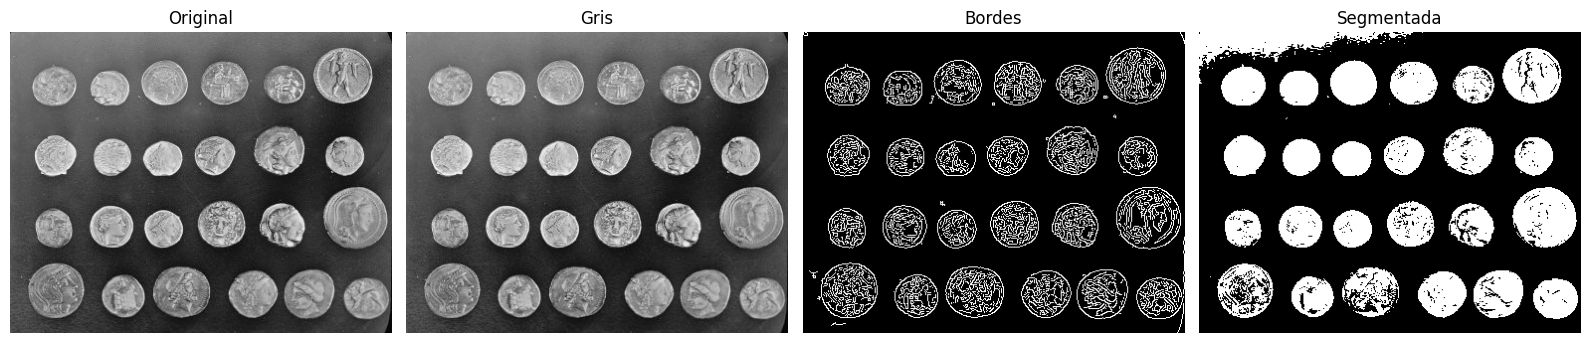

In [22]:
# Probamos el pipeline con 'monedas.jpg'
resultados = pipeline_procesamiento('monedas.jpg')

# Mostramos todos los resultados
if resultados:
    mostrar_imagenes(list(resultados.values()), list(resultados.keys()), figsize=(16,5))

###Reflexión y Síntesis (5 minutos)

¡Felicitaciones por completar el laboratorio! Tómate un momento para reflexionar sobre lo que aprendiste.

#### Preguntas de Síntesis:

- ¿Cuáles fueron las principales diferencias que notaste entre usar OpenCV y scikit-image? Por ejemplo, en la forma de llamar a las funciones o en los formatos de imagen que esperan.

- Pensá en una aplicación real o práctica para cada una de las siguientes técnicas:

`Detección de bordes:` ___________________

`Segmentación por umbral:` ___________________

`Manipulación de canales de color:` ___________________

- Si tuvieras que procesar automáticamente un lote de 1000 imágenes, ¿qué consideraciones adicionales tendrías en cuenta que no fueron cruciales en este laboratorio (por ejemplo, manejo de errores, variabilidad entre imágenes, eficiencia)?

**Diferencias entre OpenCV y scikit-image:**

OpenCV está más orientado a procesamiento en tiempo real
y espera imágenes en formato BGR, con funciones muy optimizadas para video y cámara. Scikit-image suele trabajar con imágenes en formato RGB o en escala de grises normalizadas (0 a 1), y tiene una API más orientada a análisis científico y procesamiento por pasos, con funciones que devuelven arrays float o booleanos.

**Aplicaciones prácticas de cada técnica:**

Detección de bordes: Identificación de contornos de objetos para visión robótica o inspección industrial.

Segmentación por umbral: Contar monedas, células o defectos en imágenes donde el objeto se diferencia claramente del fondo.

Manipulación de canales de color: Ajuste de balance de color, detección de características por color, o filtros artísticos en fotografía.

**Consideraciones para procesar automáticamente 1000 imágenes:**

- Manejo de errores: verificar que cada imagen se cargue correctamente antes de procesarla.
- Eficiencia: usar procesamiento vectorizado y/o paralelización para acelerar el flujo de trabajo.
- Normalización: considerar diferencias de tamaño, iluminación y formato entre imágenes.
- Registro y logging: almacenar resultados intermedios, estadísticas o imágenes problemáticas.
- Gestión de memoria: liberar imágenes grandes cuando ya no se necesitan para no saturar la RAM.